<a href="https://colab.research.google.com/github/DishaShinde22/Chatbot/blob/main/chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Langgraph Chatbot

In [ ]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper
# tools and utility class to search and retriev data from Arxiv and Wikipedia(that need to query external sources)

In [ ]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500) # Creates an API wrapper to query arXiv, limited to 2 results, each truncated to 500 characters.
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv,description="Query arxiv paper") # Wraps the API in a LangChain-compatible tool so agents can call it with a natural-language query
print(arxiv.name)

arxiv


In [ ]:
arxiv.invoke("Attention is all you need") # Arxiv tool is succesfully working

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

In [ ]:
api_wrapper_wiki= WikipediaAPIWrapper(top_k_results=2,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.name

'wikipedia'

Tools are ready, now we need to integrate them in the workflow

In [ ]:
import os

os.environ["TAVILY_API_KEY"]="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"
os.environ["GROQ_API_KEY"]="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"
# set api key

In [ ]:
from langchain_tavily import TavilySearch

tavily = TavilySearch(
    max_results=1,
    topic="general",
    # include_answer=False,
    # include_raw_content=False,
    # include_images=False,
    # include_image_descriptions=False,
    # search_depth="basic",
    # time_range="day",
    # include_domains=None,
    # exclude_domains=None
)
# It creates a tool that lets a LangChain agent query arXiv using natural language and get paper summaries.

In [ ]:
tavily.invoke({"query": "What happened at the last wimbledon"})

{'query': 'What happened at the last wimbledon',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'Injuries are adding up at Wimbledon and determining the outcomes of ...',
   'url': 'https://apnews.com/article/wimbledon-djokovic-rain-injuries-slipping-1963887a00cdbcabb4d7ea9492028245',
   'content': '![Image 8: Lorenzo Musetti of Italy falls to the ground as he celebrates after defeating Giovanni Mpetshi Perricard of France in their fourth round match at the Wimbledon tennis championships in London, Monday, July 8, 2024. ![Image 10: Taylor Fritz of the United States falls as he attempts to make a backhand return to Alexander Zverev of Germany during their fourth round match at the Wimbledon tennis championships in London, Monday, July 8, 2024. ![Image 16: Lorenzo Musetti of Italy falls to the ground as he celebrates after defeating Giovanni Mpetshi Perricard of France in their fourth round match at the Wimbledon tennis championships in London, Monda

In [ ]:
tools=[arxiv, wiki, tavily] #  list of tools that a LangGraph agent can use to answer queries by calling external sources

In [ ]:
## initialise the LLM model
from langchain_groq import ChatGroq

llm=ChatGroq(model="qwen-qwq-32b")

In [ ]:
llm.invoke("What is AI")

AIMessage(content='\n<think>\nOkay, I need to explain what AI is. Let me start by recalling what I know. AI stands for Artificial Intelligence, right? It\'s a broad field, so I should break it down. Maybe start with a simple definition. AI refers to machines or systems that can perform tasks that typically require human intelligence. \n\nHmm, but what are those tasks exactly? Things like problem-solving, learning, perception, understanding language, recognizing patterns. Oh, right, and decision-making. I should mention different types of AI. There\'s weak AI and strong AI. Weak AI is designed for specific tasks, like voice assistants or image recognition. Strong AI would be more general, capable of any intellectual task a human can do, but that\'s more theoretical.\n\nWait, maybe I should explain the main approaches to AI. Machine learning comes to mind. That\'s a subset of AI where systems learn from data. Then there\'s deep learning, which uses neural networks. Natural Language Proce

In [ ]:
llm_with_tools=llm.bind_tools(tools=tools) # This line binds the list of external tools to the LLM so it can call them when needed during reasoning or answering queries.

In [ ]:
llm_with_tools.invoke("What is the recent news on AI")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_s2r7', 'function': {'arguments': '{"query": "recent news on AI", "topic": "news", "time_range": "day", "search_depth": "advanced"}', 'name': 'tavily_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 392, 'prompt_tokens': 1298, 'total_tokens': 1690, 'completion_time': 0.952009557, 'prompt_time': 0.060961893, 'queue_time': 0.024172529999999998, 'total_time': 1.01297145}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_3796682456', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-d2f2a04e-bfc0-49a8-b2bf-4b6e08f02d9f-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'recent news on AI', 'topic': 'news', 'time_range': 'day', 'search_depth': 'advanced'}, 'id': 'call_s2r7', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1298, 'output_tokens': 392, 'total_tokens': 1690})

In [ ]:
llm_with_tools.invoke("What is Machine Learning")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_hh0h', 'function': {'arguments': '{"query": "Machine Learning"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 226, 'prompt_tokens': 1295, 'total_tokens': 1521, 'completion_time': 0.549070804, 'prompt_time': 0.060942743, 'queue_time': 0.026029568999999995, 'total_time': 0.610013547}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_3796682456', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-72beaa04-e51a-4388-8a59-849521bcd61f-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Machine Learning'}, 'id': 'call_hh0h', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1295, 'output_tokens': 226, 'total_tokens': 1521})

## Workflow

In [ ]:
## State workflow
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage  # Human Message or AI message
from typing import Annotated # labelling
from langgraph.graph import add_messages  ## Reducers in langgraph

In [ ]:
class State(TypedDict):
  messages: Annotated[list[AnyMessage],add_messages]
# State class where messages is a list of chat messages (AnyMessage), and each time the state updates, new messages are appended using the add_messages merge strategy—ideal for tracking conversation history in LangGraph.
# State class-Describes what pieces of data (like messages, memory, user input) the graph nodes will receive and return.

In [ ]:
## Entire Chatbot with langgraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

StateGraph: A graph in LangGraph that tracks the flow of state (data) through nodes, managing inputs and outputs between tasks.

START: A special node in LangGraph that marks the beginning of a process or flow.

END: A special node in LangGraph that signifies the completion of a flow or process.

ToolNode: A node in LangGraph that connects an external tool (like an API or service) to the graph for data processing or querying.

tools_condition: A function or condition used to control the execution of tools based on certain criteria (e.g., running a tool only if a condition is met).

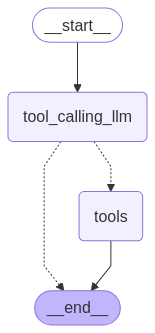

In [ ]:
## Node definiion
def tool_calling_llm(state:State):
  return {"messages":[llm_with_tools.invoke(state["messages"])]}

## Build grapgh
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## Edges
builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    #If the latest message(result) from assistant is a tool call --> tools_condition routes to tools"
    #If the latest message(result) from assistant is not a tool call --> tools_condition routes to END"
    tools_condition,
)
builder.add_edge("tools",END)

graph=builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
messages=graph.invoke({"messages":"1706.03762"})
for m in messages['messages']:
  m.pretty_print()
# Getting response from the tool

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_rzzh)
 Call ID: call_rzzh
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base


In [ ]:
messages=graph.invoke({"messages":"Hi i am Disha"})
for m in messages['messages']:
  m.pretty_print()


================================ Human Message =================================

Hi i am Disha
================================== Ai Message ==================================

Hello Disha! Nice to meet you. How can I assist you today? Feel free to ask me any questions or let me know if you need help with anything specific! 😊


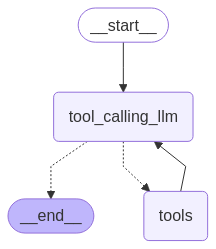

In [ ]:
## Node definiion
def tool_calling_llm(state:State):
  return {"messages":[llm_with_tools.invoke(state["messages"])]}

## Build grapgh
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## Edges
builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    #If the latest message(result) from assistant is a tool call --> tools_condition routes to tools"
    #If the latest message(result) from assistant is not a tool call --> tools_condition routes to END"
    tools_condition,
)
builder.add_edge("tools","tool_calling_llm")

graph=builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
messages=graph.invoke({"messages":"Hi I am Disha and please tell me the recent reseach paper on Quantum Computing"})
for m in messages['messages']:
  m.pretty_print()
# Getting this message directly from LLM

================================ Human Message =================================

Hi I am Disha and please tell me the recent reseach paper on Quantum Computing
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_z7y5)
 Call ID: call_z7y5
  Args:
    query: Quantum Computing
================================= Tool Message =================================
Name: arxiv

Published: 2022-08-01
Title: The Rise of Quantum Internet Computing
Authors: Seng W. Loke
Summary: This article highlights quantum Internet computing as referring to
distributed quantum computing over the quantum Internet, analogous to
(classical) Internet computing involving (classical) distributed computing over
the (classical) Internet. Relevant to quantum Internet computing would be areas
of study such as quantum protocols for distributed nodes using quantum
information for computations, qua
================================== Ai Message ============================

In [ ]:
messages=graph.invoke({"messages":"What is the recent AI news and please tell me the recent reseach paper on Quantum Computing"})
for m in messages['messages']:
  m.pretty_print()


================================ Human Message =================================

What is the recent AI news and please tell me the recent reseach paper on Quantum Computing
================================== Ai Message ==================================
Tool Calls:
  tavily_search (call_bdmm)
 Call ID: call_bdmm
  Args:
    query: AI news
    topic: news
    time_range: week
    search_depth: advanced
  arxiv (call_sf0e)
 Call ID: call_sf0e
  Args:
    query: Quantum Computing
================================= Tool Message =================================
Name: tavily_search

{"query": "AI news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://news.faharas.net/310426/microsofts-most-capable-new-phi/", "raw_content": null, "title": "Microsoft's Phi 4 AI Model Surpasses Expectations, Rivals Larger Systems with Unmatched Performance - Faharas News", "score": 0.61668247, "published_date": "Thu, 01 May 2025 05:22:16 GMT", "content": "Potential for i

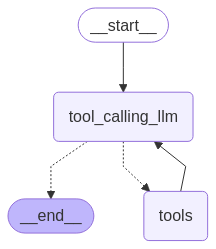

In [ ]:
## Node definiion
def tool_calling_llm(state:State):
  return {"messages":[llm_with_tools.invoke(state["messages"])]}

## Build grapgh
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## Edges
builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    #If the latest message(result) from assistant is a tool call --> tools_condition routes to tools"
    #If the latest message(result) from assistant is not a tool call --> tools_condition routes to END"
    tools_condition,
)
builder.add_edge("tools","tool_calling_llm")

graph=builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))